In [1]:
import numpy as np
import mgym
import matplotlib.pyplot as plt

In [29]:
class Agent:
    def __init__(self, env, dis=0.9):
        self.env = env
        self.dis = dis
        self.value_table = np.zeros(env.observation_space.n)
        self.policy_table = np.ones((env.observation_space.n, env.action_space.n)) * (1.0 / env.action_space.n)
    
    def iterate_value(self, env=None):
        if env == None:
            env = self.env
            
        next_value_table = np.zeros(env.observation_space.n)
        for s in range(env.observation_space.n):
            value_sum = 0.
            for a in range(env.action_space.n):
                env.reset_state(s)
                policy = self.policy_table[s, a]
                s1, reward, done, _ = env.step(a)
                value_next = self.value_table[s1]
                value = policy * (reward + self.dis * value_next)
                # print(s, mgym.action_name(a), s1, reward, done, value_next, value)
                value_sum += value
            next_value_table[s] = value_sum
            
        return next_value_table
    
    def iterate_policy(self, env=None):
        if env == None:
            env = self.env
            
        next_policy_table = np.zeros((env.observation_space.n, env.action_space.n))
        for s in range(env.observation_space.n):
            next_values = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                env.reset_state(s)
                if env.done:
                    continue
                s1, reward, done, _ = env.step(a)
                value_next = self.value_table[s1]
                value = reward + self.dis * value_next
                next_values[a] = value
                # print("    ", mgym.action_name(a), s1, reward, value_next, value)
            max_value = np.max(next_values)
            max_value_count = (next_values == max_value).sum()
            next_policy = np.zeros(env.action_space.n)
            next_policy[next_values == max_value] = 1.0 / max_value_count
            # print(s, next_values, max_value, max_value_count, next_policy)
            
            next_policy_table[s] = next_policy
            
        return next_policy_table
    
    def policy_evaludate(self, env=None, cs=None):
        if env == None:
            env = self.env
            
        next_value_table = self.iterate_value(env)
        self.value_table = next_value_table
        
        if cs is not None:
            cs.append((self.value_table ** 2).sum())
            
    def policy_improvement(self, env=None):
        if env == None:
            env = self.env
            
        next_policy_table = self.iterate_policy(env)
        self.policy_table = next_policy_table
            
    def train(self, num_episode=100, env=None):
        if env == None:
            env = self.env

        cs = []
        for episode in range(num_episode):
            self.policy_evaludate(env, cs)
            self.policy_improvement()
            
        return cs

In [30]:
env = mgym.make("5x5")

In [31]:
a = Agent(env)

In [32]:
cs = a.train()

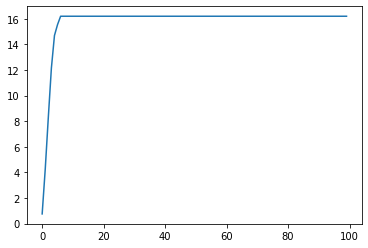

In [33]:
plt.plot(cs)

In [34]:
a.policy_table.reshape(5,5,4)

array([[[0.  , 0.5 , 0.5 , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  ],
        [0.5 , 0.5 , 0.  , 0.  ]],

       [[0.  , 1.  , 0.  , 0.  ],
        [0.5 , 0.  , 0.  , 0.5 ],
        [0.  , 1.  , 0.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  ],
        [0.5 , 0.5 , 0.  , 0.  ]],

       [[0.  , 1.  , 0.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25],
        [1.  , 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , 0.  ]],

       [[0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 0.  , 1.  ],
        [0.5 , 0.  , 0.  , 0.5 ],
        [0.5 , 0.  , 0.  , 0.5 ]],

       [[0.  , 0.  , 0.5 , 0.5 ],
        [0.  , 0.  , 0.5 , 0.5 ],
        [0.  , 0.  , 0.  , 1.  ],
        [0.5 , 0.  , 0.  , 0.5 ],
        [0.5 , 0.  , 0.  , 0.5 ]]])